In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from helper import test_classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load MNIST data
# Split data into train-test set with stratified sampling

mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y) # 30% testing

[  0  20  40  60  80 100 120 140 160 180]


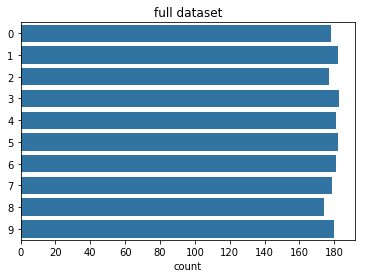

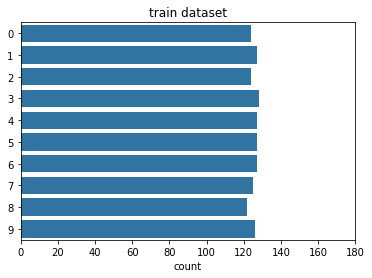

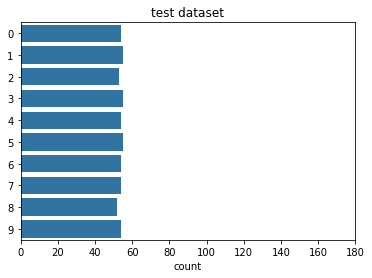

In [3]:
# Visualize frequencies

max_count = pd.Series(y).value_counts()[0]
dist = 20
bins = np.arange(0, max_count + dist, dist)
print(bins)

def display_digits_count(data, title):
    sns.countplot(y=data, color=sns.color_palette()[0])
    plt.title(title)
    plt.xticks(bins)
    plt.show()
    
display_digits_count(y, "full dataset")
display_digits_count(y_train, "train dataset")
display_digits_count(y_test, "test dataset")

# Logistic Regression

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
"Accuracy: {0:.2f}%".format(accuracy * 100)

'Accuracy: 95.74%'

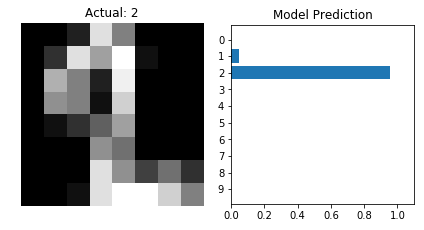

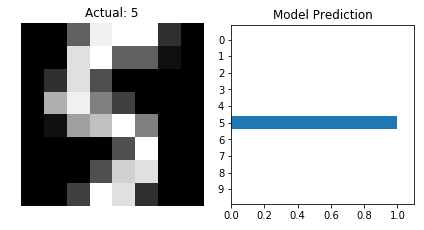

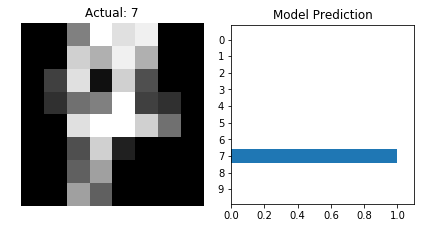

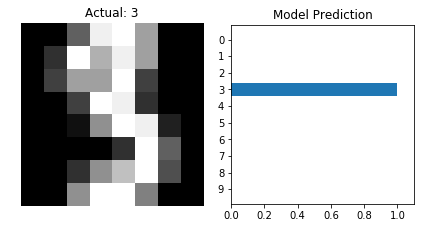

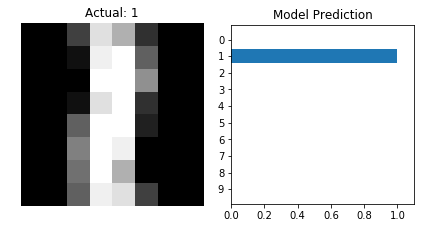

In [5]:
# Plot prediction results
np.random.seed(40)
for n in np.random.randint(0, X_test.shape[0], 5):
    test_classification(model, X_test, y_test, n)